In [27]:
import pandas as pd 
import numpy as np
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel("house_price_Test.xlsx",index_col=0)

In [3]:
value_counts = df['Neighborhood'].value_counts()
neighborhood_counts = {}

for value, count in value_counts.items():
    neighborhood_counts[value] = count

In [6]:
neighborhood_counts

{'Etlik': 513,
 'Ayvalı': 330,
 'Atapark': 238,
 'Harbiye': 225,
 'Durali Alıç': 225,
 'Merkez': 222,
 'İlkadım': 218,
 'Akşemsettin': 210,
 'General Zeki Doğan': 202,
 'Mareşal Çakmak': 197,
 'Karapürçek': 190,
 'İstasyon': 188,
 'Yayla': 184,
 'Naci Çakır': 183,
 'Aşağı Eğlence': 178,
 'Şahintepe': 173,
 'Keklik Pınarı': 172,
 'Mimar Sinan': 171,
 'İncirli': 171,
 'Cengizhan': 168,
 'Yunus Emre': 164,
 'Mutlu': 162,
 'Emek': 161,
 'Birlik': 161,
 'Aydınlıkevler': 161,
 'Fatih': 158,
 'Turgut Özal': 156,
 'Plevne': 150,
 'Yükseltepe': 150,
 'Ata': 149,
 'Huzur': 148,
 'Karakaya': 147,
 'Osman Temiz': 147,
 'Pınarbaşı': 145,
 'Fahri Korutürk': 145,
 'Bağlıca': 142,
 'Akpınar': 141,
 'Kutlu': 140,
 'Esertepe': 140,
 'Kırkkonaklar': 137,
 'Ovacık': 134,
 'Malazgirt': 133,
 'Topçu': 130,
 'Selçuklu': 129,
 'Tandoğan': 129,
 'Yukarı Bahçelievler': 126,
 'İlkbahar': 125,
 'Sokullu Mehmet Paşa': 124,
 'Piyade': 120,
 'Mustafa Kemal': 118,
 'Aydınlar': 116,
 'Bahçelievler': 114,
 'Kanuni': 11

In [ ]:
for i in neighborhood_counts:
    filtered_df = df[df["Neighborhood"] == i]
    if neighborhood_counts[i] > 200:


        filtered_df = filtered_df.drop(columns=['Neighborhood',"District"], axis=1)

   
        X = filtered_df.iloc[:, :-1].values
        Y = filtered_df["Price"].values/1000000
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred_train_lr = lr.predict(X_train)
        y_pred_test_lr = lr.predict(X_test)
        mse_test_lr = MSE(y_test, y_pred_test_lr)
        r2 = r2_score(y_test, y_pred_test_lr)
        if  (0 < r2 < 1):
            print(f"R2 score  for {i}: {r2}")
        else:
            print(f"poor performance by {i}: {r2}")



R2 score  for Etlik: 0.6100037400087139
poor performance by Ayvalı: -0.040218677561267846
poor performance by Atapark: -61540.12209200431
R2 score  for Harbiye: 0.364985173082068
R2 score  for Durali Alıç: 0.381979878475627
R2 score  for Merkez: 0.698494003624089
R2 score  for İlkadım: 0.583652522150045
R2 score  for Akşemsettin: 0.6829631194439671
R2 score  for General Zeki Doğan: 0.3732420810817981


In [38]:
for i in neighborhood_counts:
    filtered_df = df[df["Neighborhood"] == i]
    if neighborhood_counts[i] > 200:

        filtered_df = filtered_df.drop(columns=['Neighborhood',"District"], axis=1)

 
        X = filtered_df.iloc[:, :-1].values
        Y = filtered_df["Price"].values/1000000
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        xgb = xg.XGBRegressor()

        param_grid = {
        'n_estimators': [500],
        'learning_rate': [0.05],
        'max_depth': [5, 7],
        'min_child_weight': [1, 5],
        'subsample': [0.5,  1.0],
        'colsample_bytree': [0.5, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.5, 1],
        'reg_lambda': [1, 1.5, 2],
        "early_stopping_rounds":[25]
    }

  
        grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=2,
        verbose=2
    )


        grid_search.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=False)       
        best_model = grid_search.best_estimator_    

        best_model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=False)
        y_pred_train_lr = best_model.predict(X_train)
        y_pred_test_lr = best_model.predict(X_test)
        mse_test_lr = MSE(y_test, y_pred_test_lr)
        r2 = r2_score(y_test, y_pred_test_lr)
        if  (0 < r2 < 1):
            print(f"R2 score  for {i}: {r2}")
        else:
            print(f"poor performance by {i}: {r2}")

Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Etlik: 0.6342237114039996
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Ayvalı: 0.3092551918295565
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Atapark: 0.5764938451015589
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Harbiye: 0.5516288655178101
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Durali Alıç: 0.5059934140832144
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Merkez: 0.8297171064537409
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for İlkadım: 0.5891346060852072
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for Akşemsettin: 0.7945464189155156
Fitting 2 folds for each of 432 candidates, totalling 864 fits
R2 score  for General Zeki Doğan: 0.4073948296538712


In [15]:
value_counts = df['District'].value_counts()
district_counts = {}

for value, count in value_counts.items():
    district_counts[value] = count

C:\Users\PC\AppData\Local\Temp\ipykernel_9872\2453619455.py:25: RuntimeWarning: invalid value encountered in log1p
  y_pred_log = np.log1p(y_pred_test_lr)
C:\Users\PC\AppData\Local\Temp\ipykernel_9872\2453619455.py:25: RuntimeWarning: invalid value encountered in log1p
  y_pred_log = np.log1p(y_pred_test_lr)
C:\Users\PC\AppData\Local\Temp\ipykernel_9872\2453619455.py:25: RuntimeWarning: invalid value encountered in log1p
  y_pred_log = np.log1p(y_pred_test_lr)
C:\Users\PC\AppData\Local\Temp\ipykernel_9872\2453619455.py:25: RuntimeWarning: invalid value encountered in log1p
  y_pred_log = np.log1p(y_pred_test_lr)


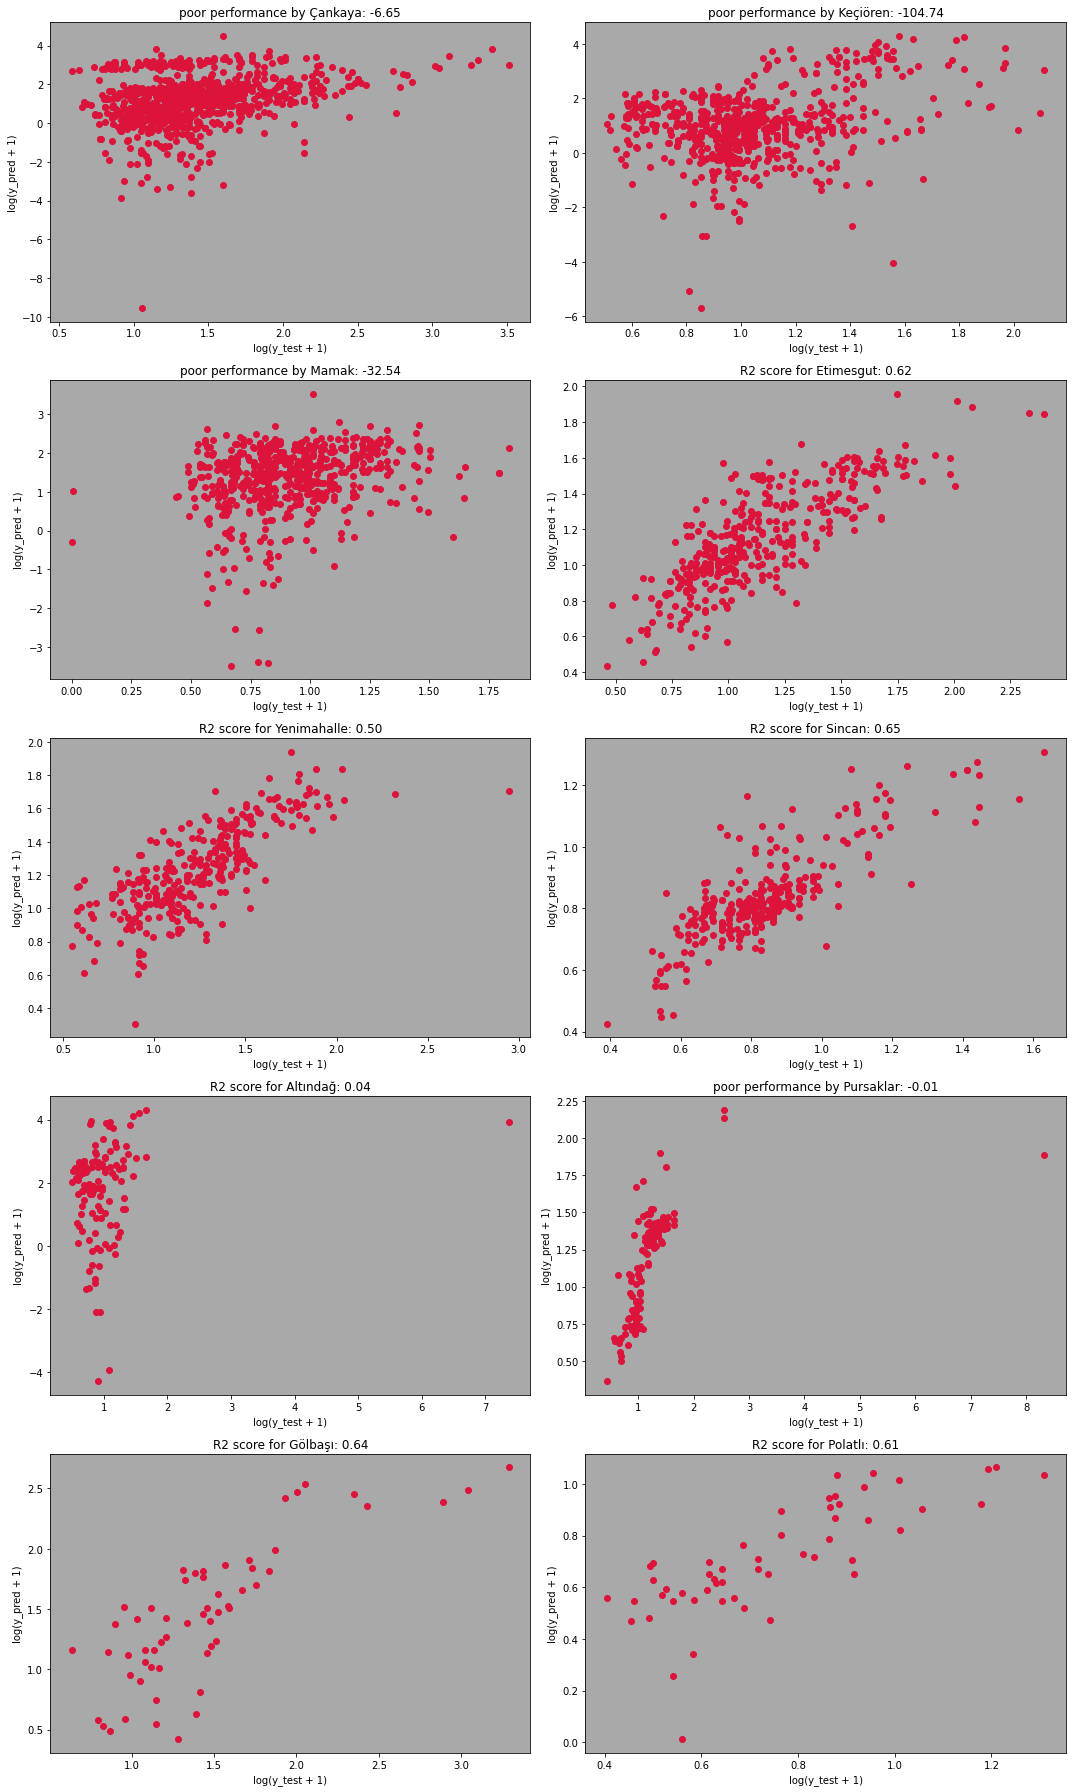

In [54]:
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
axs = axs.flatten()

plot_index = 0

total_score = []

for i in district_counts:
    filtered_df = df[df["District"] == i]
    if district_counts[i] > 100:


        filtered_df = filtered_df.drop(columns=['Neighborhood',"District"], axis=1)

        X = filtered_df.iloc[:, :-1].values
        Y = filtered_df["Price"].values/1000000
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred_train_lr = lr.predict(X_train)
        y_pred_test_lr = lr.predict(X_test)
        mse_test_lr = MSE(y_test, y_pred_test_lr)
        r2 = r2_score(y_test, y_pred_test_lr)
        y_test_log = np.log1p(y_test)
        y_pred_log = np.log1p(y_pred_test_lr)
        axs[plot_index].set_facecolor('darkgray')
        axs[plot_index].scatter(y_test_log, y_pred_log, c='crimson')
        axs[plot_index].set_xlabel('log(y_test + 1)')
        axs[plot_index].set_ylabel('log(y_pred + 1)')
        
        if 0 < r2 < 1:
            axs[plot_index].set_title(f"R2 score for {i}: {r2:.2f}")
        else:
            axs[plot_index].set_title(f"poor performance by {i}: {r2:.2f}")

        plot_index += 1

plt.tight_layout()
plt.savefig('your_plot_name.png', dpi=300, bbox_inches='tight')
plt.show()
        


Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits


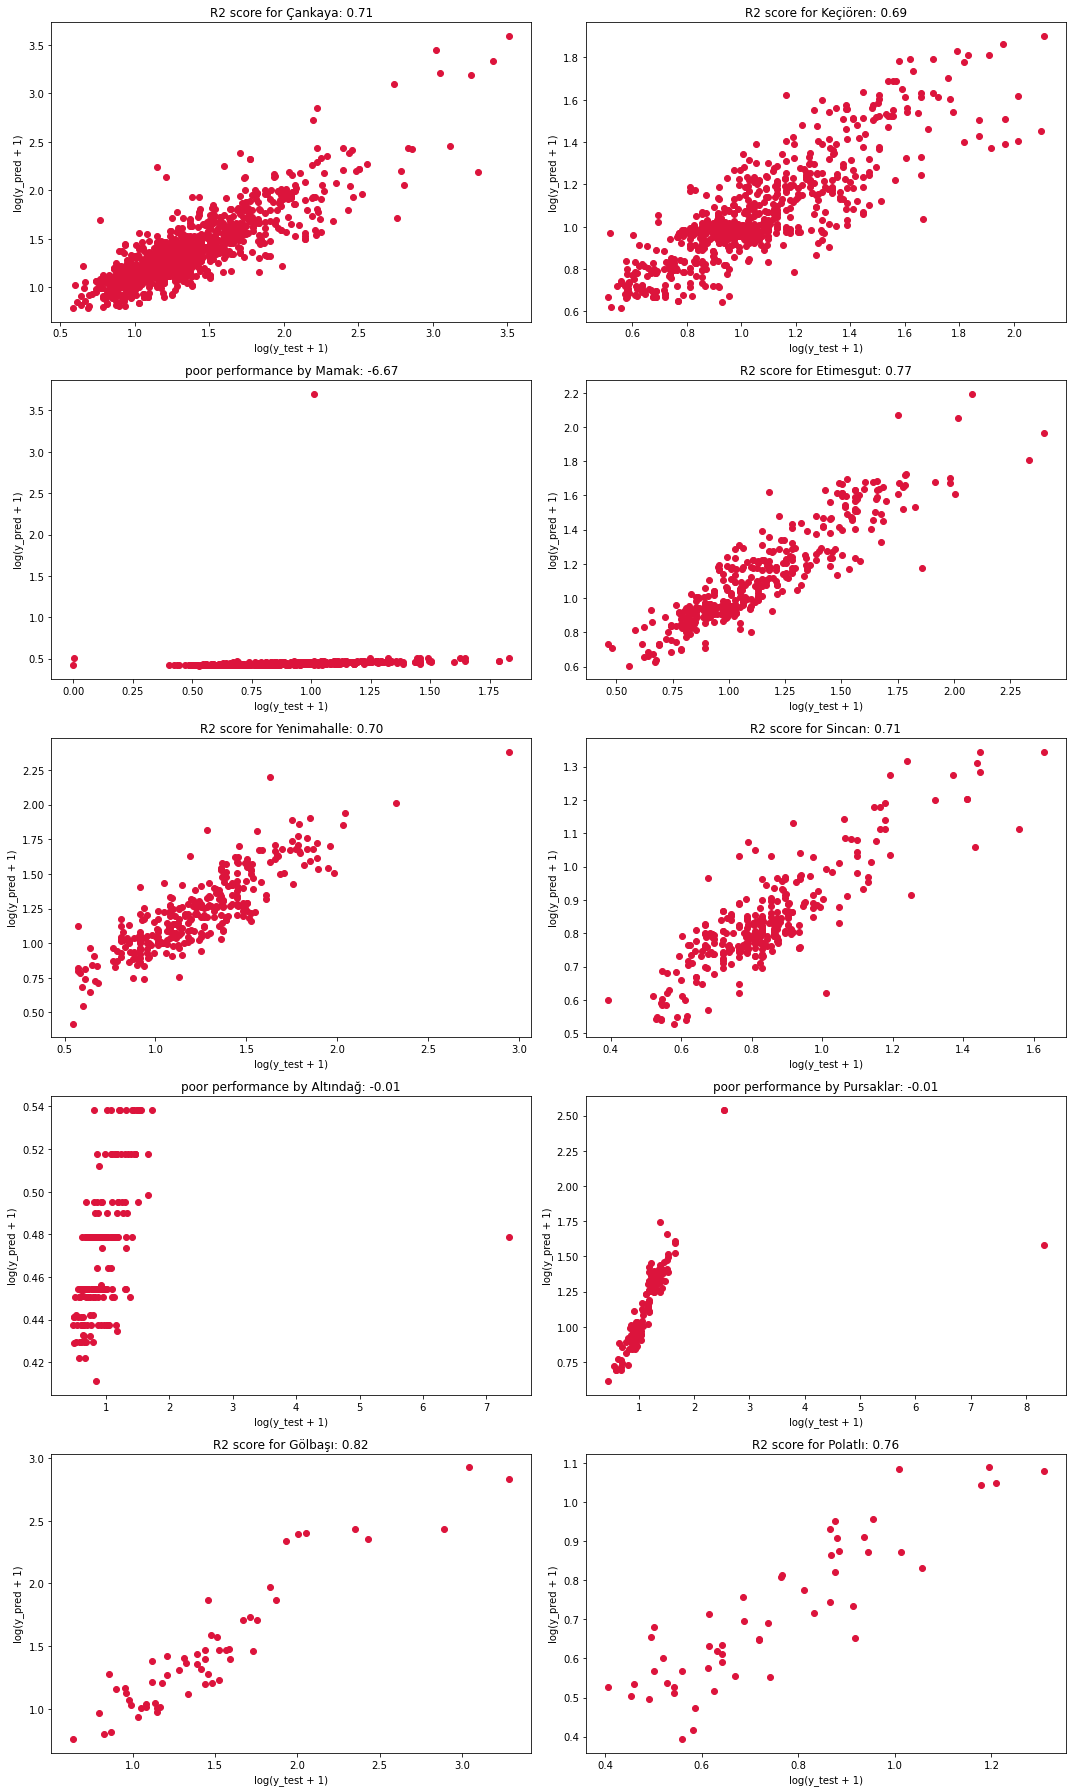

In [41]:
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
axs = axs.flatten()
ax.set_facecolor('white')

plot_index = 0

for i in district_counts:
    filtered_df = df[df["District"] == i]
    if district_counts[i] > 100:
        
    
        filtered_df = filtered_df.drop(columns=['Neighborhood',"District"], axis=1)
        
        X = filtered_df.iloc[:, :-1].values
        Y = filtered_df["Price"].values/1000000
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        xgb = xg.XGBRegressor()

        param_grid = {
        'n_estimators': [500],
        'learning_rate': [0.05],
        'max_depth': [5, 7],
        'min_child_weight': [1, 5],
        'subsample': [0.5,  1.0],
        'colsample_bytree': [0.5, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.5, 1],
        'reg_lambda': [1, 1.5, 2],
        "early_stopping_rounds":[25]
    }

        grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=2,
        verbose=2
    )

        grid_search.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=False)       
        best_model = grid_search.best_estimator_    

        best_model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=False)

        y_pred_train_lr = best_model.predict(X_train)
        y_pred_test_lr = best_model.predict(X_test)
        mse_test_lr = MSE(y_test, y_pred_test_lr)
        r2 = r2_score(y_test, y_pred_test_lr)

        y_test_log = np.log1p(y_test)
        y_pred_log = np.log1p(y_pred_test_lr)

        axs[plot_index].scatter(y_test_log, y_pred_log, c='crimson')
        axs[plot_index].set_xlabel('log(y_test + 1)')
        axs[plot_index].set_ylabel('log(y_pred + 1)')

        if 0 < r2 < 1:
            axs[plot_index].set_title(f"R2 score for {i}: {r2:.2f}")
        else:
            axs[plot_index].set_title(f"poor performance by {i}: {r2:.2f}")

        plot_index += 1

plt.tight_layout()
plt.show()